In [9]:
import pandas as pd
import sqlite3
import gzip
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
        with open('tn.movie_budgets.csv', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [10]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')

In [11]:
imdb_df = pd.read_csv('unzippedData/imdb_movies.csv')

In [12]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')

In [13]:
tmdb = pd.read_csv('unzippedData/tmdb.movies.csv')

In [14]:
rt_score = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding = ('latin-1') )

In [15]:
rt_info = pd.read_csv('unzippedData/rt.movie_info.tsv',sep = '\t')

In [16]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
rt_info['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

In [19]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [20]:
conn = sqlite3.connect('unzippedData/im.db')

In [21]:
movie_basics = pd.read_sql("""
SELECT *

FROM 
    movie_ratings AS mr
    INNER JOIN movie_basics AS mb
    USING (movie_id)
WHERE
    numvotes > 500

""",conn)

In [22]:
movie_basics.groupby('genres').size()

genres
Action                        100
Action,Adventure               27
Action,Adventure,Animation     83
Action,Adventure,Biography      9
Action,Adventure,Comedy       112
                             ... 
Thriller                      185
Thriller,War                    1
Thriller,Western                2
War                             3
Western                         8
Length: 567, dtype: int64

In [23]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         13880 non-null  object 
 1   averagerating    13880 non-null  float64
 2   numvotes         13880 non-null  int64  
 3   primary_title    13880 non-null  object 
 4   original_title   13880 non-null  object 
 5   start_year       13880 non-null  int64  
 6   runtime_minutes  13827 non-null  float64
 7   genres           13877 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 867.6+ KB


In [24]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(int)




In [25]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",", "").astype(float)


In [26]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int32  
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 248.6+ KB


In [27]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1.316722e+09


In [28]:
#ratings
    #-Gen
#money

In [29]:
mega_df = movie_basics.merge(movie_budgets, left_on = 'primary_title', right_on = 'movie', how = 'inner')

In [30]:
mega_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,"Jan 10, 2014",The Legend of Hercules,70000000,"$18,848,538",58953319.0
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,"Mar 21, 2008",The Hammer,850000,"$442,638",442638.0
2,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,"Sep 27, 2013",Baggage Claim,8500000,"$21,569,509",22885836.0
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,"Sep 23, 2011",Moneyball,50000000,"$75,605,492",111300835.0
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,"Oct 15, 2010",Hereafter,50000000,"$32,746,941",108660270.0


mega_df['Action'] = mega_df['genres'].str.contains('Action')

mega_df['Adventure'] = mega_df['genres'].str.contains('Adventure')
mega_df['Comedy'] = mega_df['genres'].str.contains('Comedy')
mega_df['Family'] = mega_df['genres'].str.contains('Family')
mega_df['Crime'] = mega_df['genres'].str.contains('Crime')
mega_df['Thriller'] = mega_df['genres'].str.contains('Thriller')
mega_df['Sport'] = mega_df['genres'].str.contains('Sport')
mega_df['Animation'] = mega_df['genres'].str.contains('Animation')
mega_df['Horror'] = mega_df['genres'].str.contains('Horror')
mega_df['Fantasy'] = mega_df['genres'].str.contains('Fantasy')
mega_df['Romance'] = mega_df['genres'].str.contains('Romance')
mega_df['Sci-Fi'] = mega_df['genres'].str.contains('Sci-Fi')
mega_df['Sport'] = mega_df['genres'].str.contains('Sport')
mega_df['Documentary'] = mega_df['genres'].str.contains('Documentary')
mega_df['History'] = mega_df['genres'].str.contains('History')
mega_df['Music'] = mega_df['genres'].str.contains('Music')
mega_df['Mystery'] = mega_df['genres'].str.contains('Mystery')
mega_df['Drama'] = mega_df['genres'].str.contains('Drama')
mega_df['War'] = mega_df['genres'].str.contains('War')
mega_df['Biography'] = mega_df['genres'].str.contains('Biography')
mega_df['Musical'] = mega_df['genres'].str.contains('Musical')


                                                   

                                                   



In [31]:
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Biography', 'Musical','Action']

for genre in genre_list:
    mega_df[genre] = mega_df['genres'].str.contains(genre)

mega_df['Profit'] = mega_df['worldwide_gross'] - mega_df['production_budget']

# Split the genres column into a list of genres
mega_df['genres'] = mega_df['genres'].str.split(',')


In [32]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1933 non-null   object 
 1   averagerating      1933 non-null   float64
 2   numvotes           1933 non-null   int64  
 3   primary_title      1933 non-null   object 
 4   original_title     1933 non-null   object 
 5   start_year         1933 non-null   int64  
 6   runtime_minutes    1932 non-null   float64
 7   genres             1933 non-null   object 
 8   id                 1933 non-null   int64  
 9   release_date       1933 non-null   object 
 10  movie              1933 non-null   object 
 11  production_budget  1933 non-null   int32  
 12  domestic_gross     1933 non-null   object 
 13  worldwide_gross    1933 non-null   float64
 14  Adventure          1933 non-null   bool   
 15  Comedy             1933 non-null   bool   
 16  Family             1933 

In [33]:
mega_df['Profit'] = mega_df['worldwide_gross'] - mega_df['production_budget']

In [34]:
mega_df.to_csv('unzippedData/megadf4.csv')

In [35]:
mega_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,...,Documentary,History,Music,Mystery,Drama,War,Biography,Musical,Action,Profit
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,"Jan 10, 2014",...,False,False,False,False,False,False,False,False,True,-11046681.0
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,"Mar 21, 2008",...,False,False,False,False,True,False,True,False,False,-407362.0
2,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,"Sep 27, 2013",...,False,False,False,False,False,False,False,False,False,14385836.0
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,"Sep 23, 2011",...,False,False,False,False,True,False,True,False,False,61300835.0
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,"Oct 15, 2010",...,False,False,False,False,True,False,False,False,False,58660270.0


In [36]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1933 non-null   object 
 1   averagerating      1933 non-null   float64
 2   numvotes           1933 non-null   int64  
 3   primary_title      1933 non-null   object 
 4   original_title     1933 non-null   object 
 5   start_year         1933 non-null   int64  
 6   runtime_minutes    1932 non-null   float64
 7   genres             1933 non-null   object 
 8   id                 1933 non-null   int64  
 9   release_date       1933 non-null   object 
 10  movie              1933 non-null   object 
 11  production_budget  1933 non-null   int32  
 12  domestic_gross     1933 non-null   object 
 13  worldwide_gross    1933 non-null   float64
 14  Adventure          1933 non-null   bool   
 15  Comedy             1933 non-null   bool   
 16  Family             1933 

In [37]:
imdb_df.loc[(imdb_df['names'] == 'Whiplash')]


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
991,Whiplash,10/22/2014,84.0,"Drama, Music","Under the direction of a ruthless instructor, ...","Miles Teller, Andrew Neiman, J.K. Simmons, Ter...",Whiplash,Released,English,3300000.0,39123993.0,AU


In [38]:
merged_df = pd.merge(imdb_df, mega_df, left_on='orig_title', right_on='original_title', how='inner')

In [39]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [40]:
imdb_df.loc[imdb_df['names']== 'Avatar']

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
68,Avatar,12/17/2009,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0,2.923706e+09,AU


In [43]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   names            10178 non-null  object 
 1   date_x           10178 non-null  object 
 2   score            10178 non-null  float64
 3   genre            10093 non-null  object 
 4   overview         10178 non-null  object 
 5   crew             10122 non-null  object 
 6   orig_title       10178 non-null  object 
 7   status           10178 non-null  object 
 8   orig_lang        10178 non-null  object 
 9   budget_x         10178 non-null  float64
 10  revenue          10178 non-null  float64
 11  country          10178 non-null  object 
 12  Adventure        10093 non-null  object 
 13  Comedy           10093 non-null  object 
 14  Family           10093 non-null  object 
 15  Crime            10093 non-null  object 
 16  Thriller         10093 non-null  object 
 17  Animation   

In [41]:
#List of genres you want to create indicator columns for
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Action']

#Create indicator columns for each genre
for genre in genre_list:
    imdb_df[genre] = imdb_df['genre'].str.contains(genre)

In [42]:
imdb_df['profit'] =  imdb_df['revenue'] - imdb_df['budget_x']

In [44]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   names            10178 non-null  object 
 1   date_x           10178 non-null  object 
 2   score            10178 non-null  float64
 3   genre            10093 non-null  object 
 4   overview         10178 non-null  object 
 5   crew             10122 non-null  object 
 6   orig_title       10178 non-null  object 
 7   status           10178 non-null  object 
 8   orig_lang        10178 non-null  object 
 9   budget_x         10178 non-null  float64
 10  revenue          10178 non-null  float64
 11  country          10178 non-null  object 
 12  Adventure        10093 non-null  object 
 13  Comedy           10093 non-null  object 
 14  Family           10093 non-null  object 
 15  Crime            10093 non-null  object 
 16  Thriller         10093 non-null  object 
 17  Animation   

In [49]:
imdb_df.groupby(['Adventure', 'Release_Month']).groups

{(False, 3): [0, 4, 6, 9, 12, 23, 24, 28, 31, 37, 54, 61, 67, 70, 71, 86, 106, 111, 121, 130, 131, 149, 152, 175, 194, 197, 207, 219, 221, 222, 225, 226, 243, 253, 259, 282, 300, 317, 346, 364, 369, 376, 392, 413, 424, 439, 443, 445, 456, 484, 488, 533, 553, 564, 583, 587, 629, 666, 688, 707, 709, 714, 723, 724, 725, 732, 739, 774, 779, 785, 795, 833, 837, 847, 848, 851, 873, 875, 900, 911, 923, 928, 945, 958, 964, 969, 972, 1001, 1016, 1048, 1058, 1089, 1097, 1098, 1099, 1106, 1126, 1129, 1149, 1175, ...], (False, 5): [35, 39, 58, 62, 117, 166, 239, 240, 265, 292, 390, 442, 448, 534, 542, 546, 558, 621, 651, 678, 685, 693, 700, 717, 733, 736, 741, 772, 800, 819, 927, 1011, 1054, 1066, 1071, 1078, 1079, 1080, 1108, 1110, 1125, 1142, 1240, 1264, 1282, 1291, 1299, 1311, 1318, 1344, 1383, 1385, 1386, 1438, 1470, 1508, 1524, 1682, 1696, 1726, 1728, 1746, 1780, 1815, 1818, 1828, 1838, 1869, 1872, 1875, 1931, 1936, 1944, 1947, 1975, 2002, 2045, 2064, 2071, 2074, 2085, 2093, 2096, 2103, 2150,

In [48]:
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War']

genre_means = {}
for genre in genre_list:
    genre_means = imdb_df[imdb_df[genre] == True].groupby('Release_Month')['profit'].mean()


In [ ]:
imdb_df[imdb_df['Action'] == True].groupby('Release_Month')['profit'].mean()

In [ ]:
print(genre_means)

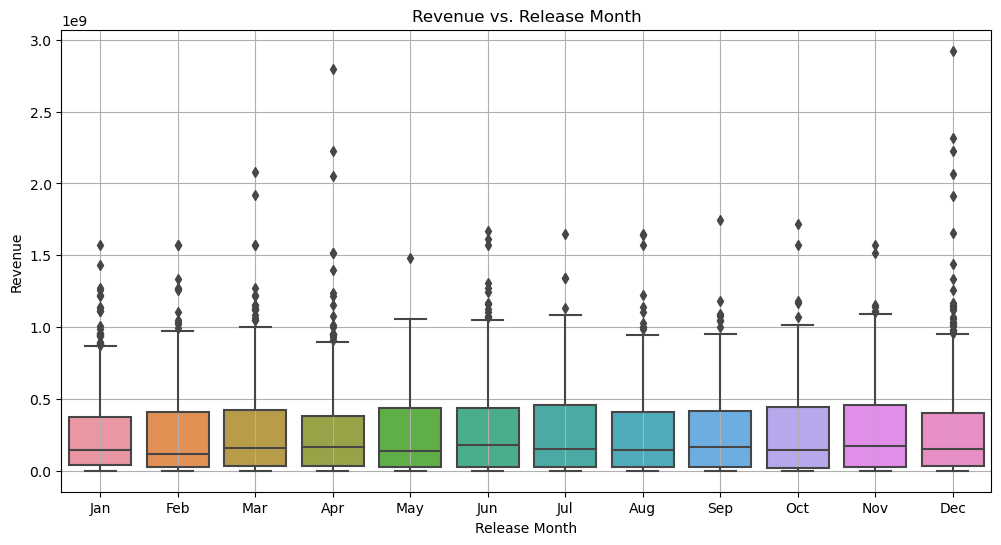

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the merged_df as mentioned in the previous response.

# Extract the month from the release_date column and create a new column for it.
imdb_df['Release_Month'] = pd.to_datetime(imdb_df['date_x']).dt.month

# Create a scatter plot to compare Profit with the release month.
plt.figure(figsize=(12, 6))
sns.boxplot(data=imdb_df,x='Release_Month', y='revenue')
plt.title('Revenue vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Revenue')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#imdb_df.to_csv('unzippedData/IMDBDF.csv')

In [52]:
imdb_movies_split = imdb_df.copy()

In [53]:
# split up the genre column, maybe we can plot the above graph for individual genre
imdb_movies_split['genre'] = imdb_movies_split['genre'].str.split(",")
imdb_movies_split = imdb_movies_split.explode('genre')
imdb_movies_split.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Action,profit,Release_Month
0,Creed III,03/02/2023,73.0,Drama,"After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,False,False,False,False,False,True,False,True,1.966167e+08,3
0,Creed III,03/02/2023,73.0,Action,"After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,False,False,False,False,False,True,False,True,1.966167e+08,3
1,Avatar: The Way of Water,12/15/2022,78.0,Science Fiction,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,True,False,False,False,False,False,False,True,1.856795e+09,12
1,Avatar: The Way of Water,12/15/2022,78.0,Adventure,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,True,False,False,False,False,False,False,True,1.856795e+09,12
1,Avatar: The Way of Water,12/15/2022,78.0,Action,Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,True,False,False,False,False,False,False,True,1.856795e+09,12


In [54]:
imdb_movies_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26410 entries, 0 to 10177
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   names            26410 non-null  object 
 1   date_x           26410 non-null  object 
 2   score            26410 non-null  float64
 3   genre            26325 non-null  object 
 4   overview         26410 non-null  object 
 5   crew             26327 non-null  object 
 6   orig_title       26410 non-null  object 
 7   status           26410 non-null  object 
 8   orig_lang        26410 non-null  object 
 9   budget_x         26410 non-null  float64
 10  revenue          26410 non-null  float64
 11  country          26410 non-null  object 
 12  Adventure        26325 non-null  object 
 13  Comedy           26325 non-null  object 
 14  Family           26325 non-null  object 
 15  Crime            26325 non-null  object 
 16  Thriller         26325 non-null  object 
 17  Animation   

In [78]:
# Assuming you have imported pandas and loaded your dataset as 'imdb_movies_split'

# Filter rows where the 'genre' column contains 'Documentary'
documentary_movies = imdb_movies_split[imdb_movies_split['genre'].str.contains('Documentary', case=False, na=False)]

# Create an empty list to store crew members
documentary_crew_members = []

# Iterate through the rows of the filtered DataFrame and add crew members to the list
for index, row in documentary_movies.iterrows():
    crew_list = row['crew']
    if isinstance(crew_list, str):
        crew_members = crew_list.split(', ')
        documentary_crew_members.extend(crew_members)

# Convert the list to a set to remove duplicate crew members (if any)
documentary_crew_members = list(set(documentary_crew_members))

# Print or use the 'documentary_crew_members' list as needed
print(documentary_crew_members)


['', "Self - Julie's Mother", 'Natalie De Vincentiis', 'Presenter', 'Self - Sound Designer', 'Thomas H. Marshburn', 'John Leguizamo', 'Self - Baron Mordo', 'Matt Gerald', 'Self - Fyre Creative Director', 'Ehren McGhehey', 'Lorelei Lee', 'Anthony LaPaglia', 'Lasse Braun', 'Sean «Poopies» McInerney', 'Sam Neill', 'Reginald Hudlin', 'Elon Musk', 'Gregory Peltz', 'Andre Lillis', 'Ravi Naik', 'Tito El Bambino', 'Michigan', 'Ken Balcomb', 'Robert Christopher Smith', 'Lance Mountain', 'Jason Headley', 'Andrew Stanton', 'Chad White', 'Casey Hooper', 'Self - Founder @PersonalDataIO', 'Emma Graham-Harrison', 'Hugh Hefner', 'Fiorella Etro', 'Molly Weasley', 'Jorge Valdano', 'Self - Fyre Co-Founder (archive footage)', 'Anthony Summers', 'Wee Man', 'Bruce Lee', 'Arthur A. Busch', 'Grigori Aleksandrov', 'Sarah French', 'Karol Sevilla', 'Jonathan Moffett', 'Miloš Forman', 'Gabrielle Anwar', 'Neil Druckmann', 'Tom Jones', 'Self - America Chavez', 'Bong Buño', 'Rose McGowan', 'Judith Arcana', 'Kevin Pa

In [61]:
documentary_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Action,profit,Release_Month
28,Money Shot: The Pornhub Story,03/15/2023,58.0,Documentary,"Featuring interviews with performers, activist...","Noelle Perdue, Self - Porn Industry Profession...",Money Shot: The Pornhub Story,Released,English,68500000.0,...,False,True,False,False,False,False,False,False,211552393.0,3
148,Orgasm Inc: The Story of OneTaste,11/05/2022,64.0,Documentary,A sexual wellness company gains fame and follo...,NaN,Orgasm Inc: The Story of OneTaste,Released,English,77400000.0,...,False,True,False,False,False,False,False,False,354211098.0,11
319,The Trapped 13: How We Survived The Thai Cave,10/05/2022,69.0,Documentary,"In this compelling documentary, members of the...","Ekapol Chanthawong, Self, Ei Khan, Titna's mot...",13 หมูป่า: เรื่องเล่าจากในถ้ำ,Released,Thai,111600000.0,...,False,True,False,False,False,False,False,False,655628967.6,10
533,Reggie,03/23/2023,54.0,Documentary,One of sport’s first and most influential mega...,"Reggie Jackson, Self, Julius Erving, Self, Han...",Reggie,Released,English,138800000.0,...,False,True,False,False,False,False,False,False,155053255.2,3
557,Super Mario Bros: This Ain't No Video Game,11/03/2014,34.0,Documentary,A documentary about the making of the live-act...,"Rocky Morton, Self, Annabel Jankel, Self, Rola...",Super Mario Bros: This Ain't No Video Game,Released,English,54640000.0,...,False,True,False,False,False,False,False,False,275216760.8,11


['', "Self - Julie's Mother", 'Natalie De Vincentiis', 'Presenter', 'Self - Sound Designer', 'Thomas H. Marshburn', 'John Leguizamo', 'Self - Baron Mordo', 'Matt Gerald', 'Self - Fyre Creative Director', 'Ehren McGhehey', 'Lorelei Lee', 'Anthony LaPaglia', 'Lasse Braun', 'Sean «Poopies» McInerney', 'Sam Neill', 'Reginald Hudlin', 'Elon Musk', 'Gregory Peltz', 'Andre Lillis', 'Ravi Naik', 'Tito El Bambino', 'Michigan', 'Ken Balcomb', 'Robert Christopher Smith', 'Lance Mountain', 'Jason Headley', 'Andrew Stanton', 'Chad White', 'Casey Hooper', 'Self - Founder @PersonalDataIO', 'Emma Graham-Harrison', 'Hugh Hefner', 'Fiorella Etro', 'Molly Weasley', 'Jorge Valdano', 'Self - Fyre Co-Founder (archive footage)', 'Anthony Summers', 'Wee Man', 'Bruce Lee', 'Arthur A. Busch', 'Grigori Aleksandrov', 'Sarah French', 'Karol Sevilla', 'Jonathan Moffett', 'Miloš Forman', 'Gabrielle Anwar', 'Neil Druckmann', 'Tom Jones', 'Self - America Chavez', 'Bong Buño', 'Rose McGowan', 'Judith Arcana', 'Kevin Pa

In [91]:
doc_crew_unique = set(documentary_crew_members)

# Print the resulting set
print(doc_crew_unique)

{'', "Self - Julie's Mother", 'Natalie De Vincentiis', 'Presenter', 'Self - Sound Designer', 'Thomas H. Marshburn', 'John Leguizamo', 'Self - Baron Mordo', 'Matt Gerald', 'Self - Fyre Creative Director', 'Ehren McGhehey', 'Lorelei Lee', 'Anthony LaPaglia', 'Lasse Braun', 'Sean «Poopies» McInerney', 'Sam Neill', 'Reginald Hudlin', 'Elon Musk', 'Gregory Peltz', 'Andre Lillis', 'Ravi Naik', 'Tito El Bambino', 'Michigan', 'Ken Balcomb', 'Robert Christopher Smith', 'Lance Mountain', 'Jason Headley', 'Andrew Stanton', 'Chad White', 'Casey Hooper', 'Self - Founder @PersonalDataIO', 'Emma Graham-Harrison', 'Hugh Hefner', 'Fiorella Etro', 'Molly Weasley', 'Jorge Valdano', 'Self - Fyre Co-Founder (archive footage)', 'Anthony Summers', 'Wee Man', 'Bruce Lee', 'Arthur A. Busch', 'Grigori Aleksandrov', 'Sarah French', 'Karol Sevilla', 'Jonathan Moffett', 'Miloš Forman', 'Gabrielle Anwar', 'Neil Druckmann', 'Tom Jones', 'Self - America Chavez', 'Bong Buño', 'Rose McGowan', 'Judith Arcana', 'Kevin Pa

In [84]:

# Create an empty dictionary to store the counts
name_counts = {}

# Iterate through the list of crew members
for name in documentary_crew_members:
    # If the name is already in the name_counts dictionary, increment its count by 1
    if name in name_counts:
        name_counts[name] += 1
    # If the name is not in the name_counts dictionary, add it with a count of 1
    else:
        name_counts[name] = 1

# Filter names with counts greater than 1 (duplicates)
duplicate_names = {name: count for name, count in name_counts.items() if count > 1}

# Print the duplicate names and their counts
for name, count in duplicate_names.items():
    print(f"{name}: {count}")


In [85]:
print(name_counts)

{'': 1, "Self - Julie's Mother": 1, 'Natalie De Vincentiis': 1, 'Presenter': 1, 'Self - Sound Designer': 1, 'Thomas H. Marshburn': 1, 'John Leguizamo': 1, 'Self - Baron Mordo': 1, 'Matt Gerald': 1, 'Self - Fyre Creative Director': 1, 'Ehren McGhehey': 1, 'Lorelei Lee': 1, 'Anthony LaPaglia': 1, 'Lasse Braun': 1, 'Sean «Poopies» McInerney': 1, 'Sam Neill': 1, 'Reginald Hudlin': 1, 'Elon Musk': 1, 'Gregory Peltz': 1, 'Andre Lillis': 1, 'Ravi Naik': 1, 'Tito El Bambino': 1, 'Michigan': 1, 'Ken Balcomb': 1, 'Robert Christopher Smith': 1, 'Lance Mountain': 1, 'Jason Headley': 1, 'Andrew Stanton': 1, 'Chad White': 1, 'Casey Hooper': 1, 'Self - Founder @PersonalDataIO': 1, 'Emma Graham-Harrison': 1, 'Hugh Hefner': 1, 'Fiorella Etro': 1, 'Molly Weasley': 1, 'Jorge Valdano': 1, 'Self - Fyre Co-Founder (archive footage)': 1, 'Anthony Summers': 1, 'Wee Man': 1, 'Bruce Lee': 1, 'Arthur A. Busch': 1, 'Grigori Aleksandrov': 1, 'Sarah French': 1, 'Karol Sevilla': 1, 'Jonathan Moffett': 1, 'Miloš Form

In [97]:
# Find the movies with the highest profit (you can change the number to get the top N movies)
top_movies = documentary_movies.nlargest(1, 'profit')  # Change 1 to get more top movies if needed

# Extract the crew members who worked on these movies
top_crew_members = top_movies['crew'].tolist()

# Display the crew members who worked on the top profit movies
print("Crew members who worked on the movies with the most profit:")
for crew in top_crew_members:
    print(crew)

Crew members who worked on the movies with the most profit:
Louis Tomlinson, Self, Oliver Wright, Louis’ PA and best friend, Matt Vines, Manager, Helene Horlyck, Louis’ vocal coach, Lottie Tomlinson, Louis’ sister, Daisy Tomlinson, Louis’ sister, Phoebe Tomlinson, Louis’ sister, Len Poulston, Louis’ grandfather, Jennifer Poulston, Louis’ grandmother


In [99]:
import pandas as pd

# Assuming you have a DataFrame named documentary_movies with columns: "Movie Name", "Crew Members", "Profit"
# Replace this with your actual DataFrame and column names

# Find the top 5 movies with the highest profit
top_movies = documentary_movies.nlargest(5, 'profit')

# Extract the crew members who worked on these movies
top_crew_members = top_movies['crew'].tolist()

# Display the crew members who worked on the top 5 profit movies
print("Crew members who worked on the top 5 movies with the most profit:")
for i, crew in enumerate(top_crew_members, start=1):
    print(f"Movie {i}:")
    print(crew)
    print()


Crew members who worked on the top 5 movies with the most profit:
Movie 1:
Louis Tomlinson, Self, Oliver Wright, Louis’ PA and best friend, Matt Vines, Manager, Helene Horlyck, Louis’ vocal coach, Lottie Tomlinson, Louis’ sister, Daisy Tomlinson, Louis’ sister, Phoebe Tomlinson, Louis’ sister, Len Poulston, Louis’ grandfather, Jennifer Poulston, Louis’ grandmother

Movie 2:
Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yoon-gi, Self, Jung Ho-seok, Self, Park Ji-min, Self, Kim Tae-hyung, Self, Jeon Jung-kook, Self

Movie 3:
David F. Sandberg, Himself, Talitha Bateman, Herself, Stephanie Sigman, Herself, Miranda Otto, Herself, Lulu Wilson, Herself, Anthony LaPaglia, Himself

Movie 4:
Maud Guillaumin, Self - Narrator (voice), Jonathan Kuntz, Self, Mark Eliot, Self, Stephen Macht, Self, Stephen Schlesinger, Self, Steven Roth, Self, Julian Glover, Self, Lawrence Guterman, Self, John T. Price, Self

Movie 5:
Rubén Doblas Gundersen, Self, Miguel Ángel Rogel, Self, Alejandro Bravo Yañez, Self, A

In [106]:

documentary_movies_profitsort = documentary_movies.sort_values(by='profit', ascending=False)

# Display the sorted DataFrame
documentary_movies_profitsort.head(10)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Action,profit,Release_Month
4483,Louis Tomlinson: All of Those Voices,03/22/2023,91.0,Documentary,Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000.0,...,False,True,False,True,False,False,False,False,1.902994e+09,3
2156,BTS: Permission to Dance on Stage - LA,09/08/2022,92.0,Documentary,"Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000.0,...,False,True,False,True,False,False,False,False,1.532417e+09,9
4755,Directing Annabelle: Creation,08/07/2017,93.0,Documentary,Director David F. Sandberg takes you through t...,"David F. Sandberg, Himself, Talitha Bateman, H...",Directing Annabelle: Creation,Released,English,227800000.0,...,False,True,False,False,False,False,False,False,1.416465e+09,8
9582,Charlton Heston: Radical to Right Wing,02/24/2023,90.0,Documentary,A look at the life and work of the iconic US a...,"Maud Guillaumin, Self - Narrator (voice), Jona...",Charlton Heston : la démesure d'un géant,Released,French,264000000.0,...,False,True,False,False,False,False,False,False,9.998241e+08,2
8877,David Attenborough: A Life on Our Planet,09/28/2020,85.0,Documentary,The story of life on our planet by the man who...,"David Attenborough, Self, Max Hughes, Young David",David Attenborough: A Life on Our Planet,Released,English,139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,9
2912,Rubius X,07/21/2022,85.0,Documentary,On the 10th anniversary of the publication of ...,"Rubén Doblas Gundersen, Self, Miguel Ángel Rog...",Rubius X,Released,"Spanish, Castilian",139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,7
5807,Peaky Blinders: The True Story,04/02/2016,85.0,Documentary,The story of the real Peaky Blinders and how t...,"Roger Vernon, Presenter",Peaky Blinders: The True Story,Released,English,139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,4
4406,No Half Measures: Creating the Final Season of...,11/26/2013,85.0,Documentary,A documentary about the making of season five ...,"Bryan Cranston, Self, Aaron Paul, Self, Anna G...",No Half Measures: Creating the Final Season of...,Released,English,139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,11
9969,Folklore: The Long Pond Studio Sessions,11/25/2020,86.0,Documentary,"An intimate concert film, in which Taylor Swif...","Taylor Swift, Self, Jack Antonoff, Self, Aaron...",Folklore: The Long Pond Studio Sessions,Released,English,221000000.0,...,False,True,False,True,False,False,False,False,8.836421e+08,11
4361,Ennio,12/08/2022,84.0,Documentary,"A portrait of Ennio Morricone, the most popula...","Ennio Morricone, Self, Silvano Agosti, Self, A...",Ennio,Released,Italian,124000000.0,...,False,True,False,True,False,False,False,False,8.587708e+08,12


In [105]:

documentary_movies_sorted_by_score = documentary_movies.sort_values(by='score', ascending=False)
documentary_movies_sorted_by_score.head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Science Fiction,Documentary,History,Music,Mystery,Drama,War,Action,profit,Release_Month
4755,Directing Annabelle: Creation,08/07/2017,93.0,Documentary,Director David F. Sandberg takes you through t...,"David F. Sandberg, Himself, Talitha Bateman, H...",Directing Annabelle: Creation,Released,English,227800000.0,...,False,True,False,False,False,False,False,False,1.416465e+09,8
2156,BTS: Permission to Dance on Stage - LA,09/08/2022,92.0,Documentary,"Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000.0,...,False,True,False,True,False,False,False,False,1.532417e+09,9
4483,Louis Tomlinson: All of Those Voices,03/22/2023,91.0,Documentary,Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000.0,...,False,True,False,True,False,False,False,False,1.902994e+09,3
9582,Charlton Heston: Radical to Right Wing,02/24/2023,90.0,Documentary,A look at the life and work of the iconic US a...,"Maud Guillaumin, Self - Narrator (voice), Jona...",Charlton Heston : la démesure d'un géant,Released,French,264000000.0,...,False,True,False,False,False,False,False,False,9.998241e+08,2
9969,Folklore: The Long Pond Studio Sessions,11/25/2020,86.0,Documentary,"An intimate concert film, in which Taylor Swif...","Taylor Swift, Self, Jack Antonoff, Self, Aaron...",Folklore: The Long Pond Studio Sessions,Released,English,221000000.0,...,False,True,False,True,False,False,False,False,8.836421e+08,11
2912,Rubius X,07/21/2022,85.0,Documentary,On the 10th anniversary of the publication of ...,"Rubén Doblas Gundersen, Self, Miguel Ángel Rog...",Rubius X,Released,"Spanish, Castilian",139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,7
4406,No Half Measures: Creating the Final Season of...,11/26/2013,85.0,Documentary,A documentary about the making of season five ...,"Bryan Cranston, Self, Aaron Paul, Self, Anna G...",No Half Measures: Creating the Final Season of...,Released,English,139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,11
8877,David Attenborough: A Life on Our Planet,09/28/2020,85.0,Documentary,The story of life on our planet by the man who...,"David Attenborough, Self, Max Hughes, Young David",David Attenborough: A Life on Our Planet,Released,English,139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,9
5807,Peaky Blinders: The True Story,04/02/2016,85.0,Documentary,The story of the real Peaky Blinders and how t...,"Roger Vernon, Presenter",Peaky Blinders: The True Story,Released,English,139800000.0,...,False,True,False,False,False,False,False,False,9.358835e+08,4
7594,One Direction: This Is Us,08/30/2013,84.0,Documentary,"""One Direction: This Is Us"" is a captivating a...","Harry Styles, Self, Niall Horan, Self, Zayn Ma...",One Direction: This Is Us,Released,English,10000000.0,...,False,True,False,True,False,False,False,False,5.850000e+07,8


In [112]:

top_10_by_profit = documentary_movies_profitsort.head(10)
top_10_by_score = documentary_movies_sorted_by_score.head(10)

duplicates_in_profit_top_10 = top_10_by_profit[top_10_by_profit.duplicated(subset='crew', keep=False)]

duplicates_in_score_top_10 = top_10_by_score[top_10_by_score.duplicated(subset='crew', keep=False)]

duplicates_in_profit_top_10.head()

duplicates_in_score_top_10.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   names            0 non-null      object 
 1   date_x           0 non-null      object 
 2   score            0 non-null      float64
 3   genre            0 non-null      object 
 4   overview         0 non-null      object 
 5   crew             0 non-null      object 
 6   orig_title       0 non-null      object 
 7   status           0 non-null      object 
 8   orig_lang        0 non-null      object 
 9   budget_x         0 non-null      float64
 10  revenue          0 non-null      float64
 11  country          0 non-null      object 
 12  Adventure        0 non-null      object 
 13  Comedy           0 non-null      object 
 14  Family           0 non-null      object 
 15  Crime            0 non-null      object 
 16  Thriller         0 non-null      object 
 17  Animation        0 non-null 

In [114]:
top_10_by_profit = documentary_movies_profitsort.head(10)
top_10_by_score = documentary_movies_sorted_by_score.head(10)

# Extract the 'Crew Members' column from both DataFrames
crew_members_profit = top_10_by_profit['crew']
crew_members_score = top_10_by_score['crew']

# Concatenate the two Series to create a single list of all crew members
all_crew_members = pd.concat([crew_members_profit, crew_members_score])

# Remove duplicates from the combined list
unique_crew_members = all_crew_members.drop_duplicates()

# Convert the unique crew members to a list
unique_crew_members_list = unique_crew_members.tolist()

# Print the list of unique crew members
print(unique_crew_members_list)

['Louis Tomlinson, Self, Oliver Wright, Louis’ PA and best friend, Matt Vines, Manager, Helene Horlyck, Louis’ vocal coach, Lottie Tomlinson, Louis’ sister, Daisy Tomlinson, Louis’ sister, Phoebe Tomlinson, Louis’ sister, Len Poulston, Louis’ grandfather, Jennifer Poulston, Louis’ grandmother', 'Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yoon-gi, Self, Jung Ho-seok, Self, Park Ji-min, Self, Kim Tae-hyung, Self, Jeon Jung-kook, Self', 'David F. Sandberg, Himself, Talitha Bateman, Herself, Stephanie Sigman, Herself, Miranda Otto, Herself, Lulu Wilson, Herself, Anthony LaPaglia, Himself', 'Maud Guillaumin, Self - Narrator (voice), Jonathan Kuntz, Self, Mark Eliot, Self, Stephen Macht, Self, Stephen Schlesinger, Self, Steven Roth, Self, Julian Glover, Self, Lawrence Guterman, Self, John T. Price, Self', 'David Attenborough, Self, Max Hughes, Young David', 'Rubén Doblas Gundersen, Self, Miguel Ángel Rogel, Self, Alejandro Bravo Yañez, Self, Abraham Bandera, Self, Irina Isaia, Self, Bente G

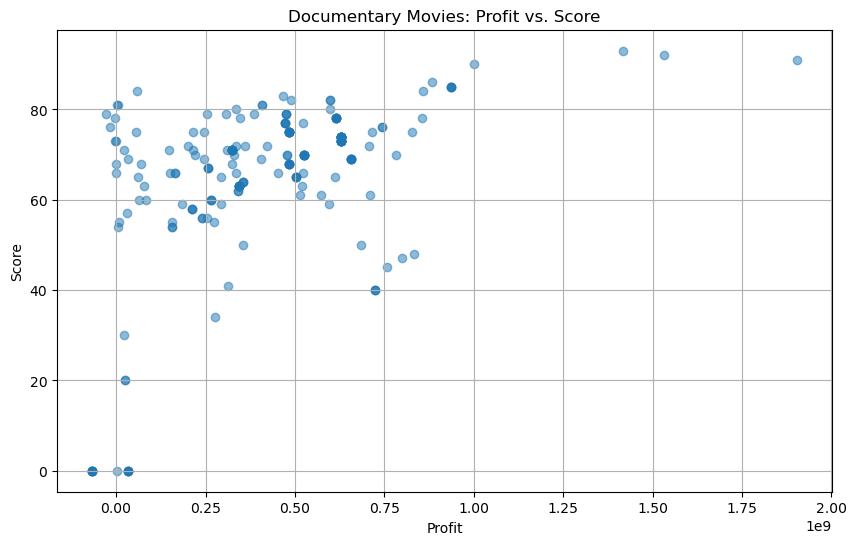

In [115]:
import matplotlib.pyplot as plt

# Assuming 'documentary_movies' is your DataFrame with columns 'Profit' and 'Score'
# Replace these column names with your actual column names

# Extract profit and score columns
profit = documentary_movies['profit']
score = documentary_movies['score']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(profit, score, alpha=0.5)
plt.title('Documentary Movies: Profit vs. Score')
plt.xlabel('Profit')
plt.ylabel('Score')
plt.grid(True)

# Show the plot
plt.show()
